In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_dir = "C:\\Users\\mosca\\Documents\\Maestria\\Tercer_trimestre\\AA2\\TP_AA2\\tp_yelp"
nombre_archivo="yelp_academic_dataset_business.json"
nombre_archivo_rw="yelp_academic_dataset_review.json"

In [3]:

path = os.path.join(current_dir, "yelp_dataset", nombre_archivo)
print(f"Leyendo archivo desde: {path}")

businesses = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        businesses.append(json.loads(line))

Leyendo archivo desde: C:\Users\mosca\Documents\Maestria\Tercer_trimestre\AA2\TP_AA2\tp_yelp\yelp_dataset\yelp_academic_dataset_business.json


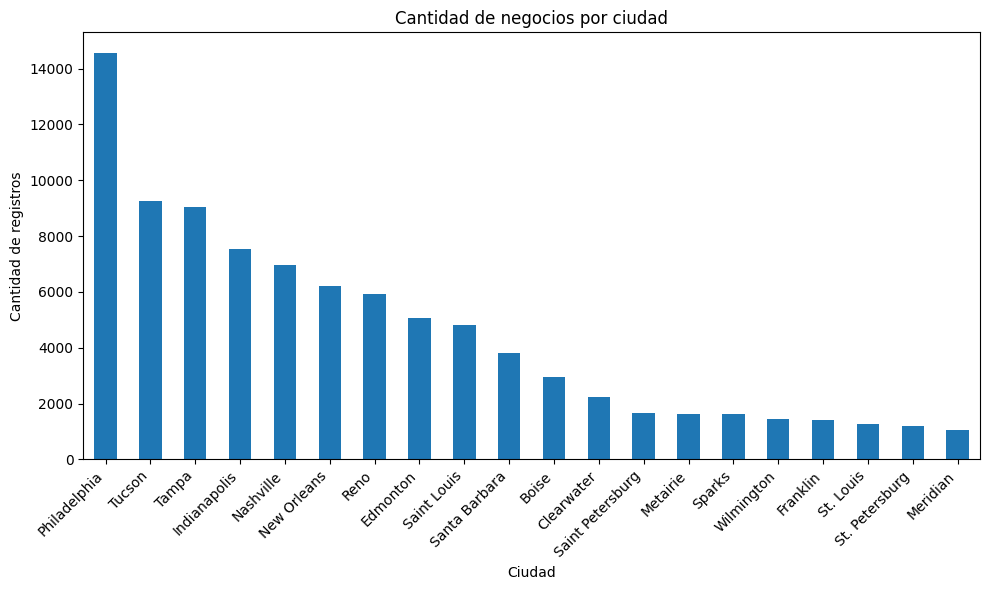

In [4]:
# Convertimos a DataFrame
df_business = pd.DataFrame(businesses)

# Contamos negocios por ciudad
city_counts = df_business["city"].value_counts()

# Mostramos las 20 principales (por ejemplo)
top_cities = city_counts.head(20)

# Graficamos
plt.figure(figsize=(10, 6))
top_cities.plot(kind="bar")
plt.title("Cantidad de negocios por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [5]:
#nos quedamos conphiladelfia
df_philly = df_business[df_business["city"] == "Philadelphia"]

In [6]:
reviews = []
with open(os.path.join(current_dir, "yelp_dataset", nombre_archivo_rw), "r", encoding="utf-8") as f:
    for line in f:
        reviews.append(json.loads(line))

df_reviews = pd.DataFrame(reviews)

In [7]:
df_merged = df_reviews.merge(df_philly[["business_id", "name", "city"]], on="business_id", how="inner")

In [8]:
df_merged.shape

(967552, 11)

In [11]:
users = []
with open(os.path.join(current_dir, "yelp_dataset", "yelp_academic_dataset_user.json"), "r", encoding="utf-8") as f:
    for line in f:
        users.append(json.loads(line))

df_users = pd.DataFrame(users)



print(f"Usuarios guardados: {len(users)}")

Usuarios guardados: 1987897


In [9]:
# Negocios que tienen al menos una review en df_merged
business_ids_philly = df_merged["business_id"].unique()

# Filtrar el dataframe original de negocios
df_business_filtered = df_business[df_business["business_id"].isin(business_ids_philly)]

# Guardar a JSON
df_business_filtered.to_json(os.path.join(current_dir, "yelp_dataset", "business_philadelphia.json"), orient="records", lines=True)

In [10]:
# Filtrar reviews originales que pertenecen a esos negocios
df_reviews_filtered = df_reviews[df_reviews["business_id"].isin(business_ids_philly)]

# Guardar a JSON
df_reviews_filtered.to_json(os.path.join(current_dir, "yelp_dataset", "review_philadelphia.json"), orient="records", lines=True)

In [14]:
user_ids_philly = df_merged["user_id"].unique()

df_users_filtered = df_users[df_users["user_id"].isin(user_ids_philly)]

df_users_filtered.to_json(os.path.join(current_dir, "yelp_dataset", "user_philadelphia.json"), orient="records", lines=True)